In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


## Baseline model for comparison

In [3]:
batch_size = 128
num_classes = 10
epochs = 5

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

In [5]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 43s 721us/step - loss: 0.2594 - accuracy: 0.9199 - val_loss: 0.0538 - val_accuracy: 0.9834
Epoch 2/5
60000/60000 [==============================] - 47s 777us/step - loss: 0.0853 - accuracy: 0.9747 - val_loss: 0.0360 - val_accuracy: 0.9878
Epoch 3/5
60000/60000 [==============================] - 45s 742us/step - loss: 0.0647 - accuracy: 0.9807 - val_loss: 0.0347 - val_accuracy: 0.9884
Epoch 4/5
60000/60000 [==============================] - 46s 771us/step - loss: 0.0529 - accuracy: 0.9844 - val_loss: 0.0329 - val_accuracy: 0.9887
Epoch 5/5
60000/60000 [==============================] - 47s 790us/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0309 - val_accuracy: 0.9893


In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.030897156588520738
Test accuracy: 0.989300012588501


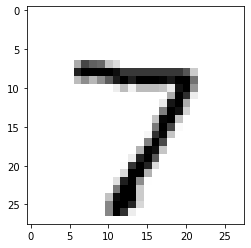

[2.4524452e-10 1.3191045e-10 1.9331009e-07 5.0395016e-08 1.2394139e-09
 3.3935871e-11 3.4768825e-14 9.9999976e-01 1.7633903e-10 2.6449191e-08]
7


In [13]:
plt.imshow(x_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()
predictions = model.predict(x_test)
print (predictions[0])
print(np.argmax(np.round(predictions[0])))

## POC

In [23]:
for i in range(epochs):
    for j in range(len(y_train) // batch_size):
        batch_x = x_train[j * batch_size: (j + 1) * batch_size]
        batch_y = y_train[j * batch_size: (j + 1) * batch_size]
        model.train_on_batch(batch_x, batch_y)

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.032216893633608745
Test accuracy: 0.9898999929428101


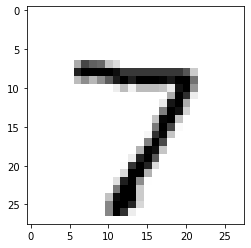

[2.9430612e-12 6.1888290e-12 6.5050623e-09 2.8421535e-10 1.2061820e-11
 4.5742381e-13 1.4858514e-16 1.0000000e+00 1.1490512e-12 1.9912780e-10]
7


In [25]:
plt.imshow(x_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()
predictions = model.predict(x_test)
print (predictions[0])
print(np.argmax(np.round(predictions[0])))



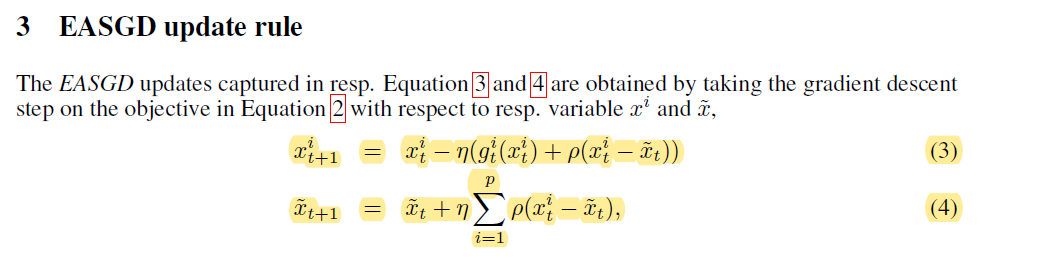

## EASGD

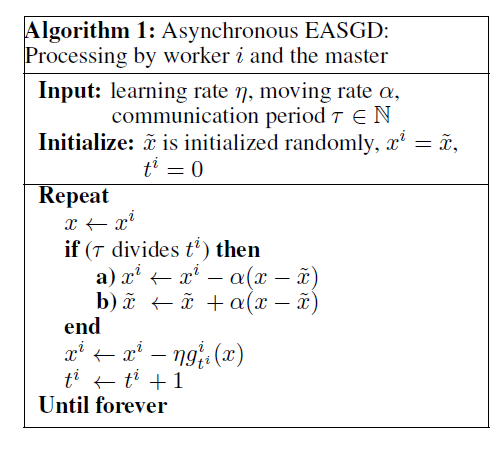

## EASGD with just one node 10000 iterations on a batch size of 128

In [26]:
model_easgd = Sequential()
model_easgd.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_easgd.add(Conv2D(64, (3, 3), activation='relu'))
model_easgd.add(MaxPooling2D(pool_size=(2, 2)))
model_easgd.add(Dropout(0.25))
model_easgd.add(Flatten())
model_easgd.add(Dense(128, activation='relu'))
model_easgd.add(Dropout(0.5))
model_easgd.add(Dense(num_classes, activation='softmax'))


c=0
alpha=0.01
num_batch=len(y_train) // batch_size

model_easgd.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

loss=[]


for n_iter in range(1,10000):

        
        
    if n_iter%1000==0:
        print("iteration number = " + str(n_iter))
        print("batch number = " + str(c))
        
    batch_x = x_train[c * batch_size: (c + 1) * batch_size]
    batch_y = y_train[c * batch_size: (c + 1) * batch_size]
    loss.append(model_easgd.train_on_batch(batch_x, batch_y)[0])
    
    c=c+1
    c=c%num_batch
    
    if n_iter==1:
        center_0=[np.random.random_sample(i.shape) for i in model_easgd.layers[0].get_weights()]
        center_1=[np.random.random_sample(i.shape) for i in model_easgd.layers[1].get_weights()]
        center_5=[np.random.random_sample(i.shape) for i in model_easgd.layers[5].get_weights()]
        center_7=[np.random.random_sample(i.shape) for i in model_easgd.layers[7].get_weights()]
    
    
    if n_iter%10 == 9:
        layer_0_old=model_easgd.layers[0].get_weights()
        layer_1_old=model_easgd.layers[1].get_weights()
        layer_5_old=model_easgd.layers[5].get_weights()
        layer_7_old=model_easgd.layers[7].get_weights()
        
    if n_iter%10 == 0:
        new_layer_0=[k-0.001*(i-j) for i,j,k in zip(layer_0_old,center_0,model_easgd.layers[0].get_weights())]
        new_layer_1=[k-0.001*(i-j) for i,j,k in zip(layer_1_old,center_1,model_easgd.layers[1].get_weights())]
        new_layer_5=[k-0.001*(i-j) for i,j,k in zip(layer_5_old,center_5,model_easgd.layers[5].get_weights())]
        new_layer_7=[k-0.001*(i-j) for i,j,k in zip(layer_7_old,center_7,model_easgd.layers[7].get_weights())]
        
        model_easgd.layers[0].set_weights(new_layer_0)
        model_easgd.layers[1].set_weights(new_layer_1)
        model_easgd.layers[5].set_weights(new_layer_5)
        model_easgd.layers[7].set_weights(new_layer_7)
        
        center_0 = [j+0.001*(i-j) for i,j in zip(layer_0_old,center_0)]
        center_1 = [j+0.001*(i-j) for i,j in zip(layer_1_old,center_1)]
        center_5 = [j+0.001*(i-j) for i,j in zip(layer_5_old,center_5)]
        center_7 = [j+0.001*(i-j) for i,j in zip(layer_7_old,center_7)]
        
        
    
        
        
    



iteration number = 1000
batch number = 63
iteration number = 2000
batch number = 127
iteration number = 3000
batch number = 191
iteration number = 4000
batch number = 255
iteration number = 5000
batch number = 319
iteration number = 6000
batch number = 383
iteration number = 7000
batch number = 447
iteration number = 8000
batch number = 43
iteration number = 9000
batch number = 107


In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07752352266944945
Test accuracy: 0.9758999943733215


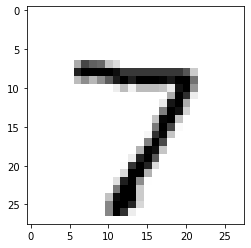

[3.00522163e-09 8.74031889e-11 1.09788725e-05 1.08462825e-06
 7.78516314e-12 3.32360701e-11 5.00090031e-15 9.99987364e-01
 7.72411468e-10 6.42101497e-07]
7


In [28]:
plt.imshow(x_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()
predictions = model.predict(x_test)
print (predictions[0])
print(np.argmax(np.round(predictions[0])))

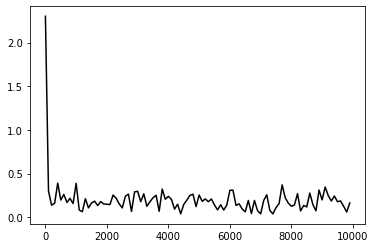

In [36]:
plt.plot(range(1,10000,100), loss[::100], color='black')

## Parallelizing EASGD 

In [47]:
def training_batch(c,model):

    layer_old=()
   
  

    for n_iter in range(1,10):
        if n_iter%100==0:
            print("iteration number = " + str(n_iter))
            print("batch number = " + str(c))
        batch_x = x_train[c * batch_size: (c + 1) * batch_size]
        batch_y = y_train[c * batch_size: (c + 1) * batch_size]
        model.train_on_batch(batch_x, batch_y)
        c=c+1
        c=c%num_batch
        
        if n_iter == 9:
            layer_0_old=model.layers[0].get_weights()
            layer_1_old=model.layers[1].get_weights()
            layer_5_old=model.layers[5].get_weights()
            layer_7_old=model.layers[7].get_weights()
            layer_old = (layer_0_old,layer_1_old,layer_5_old,layer_7_old)
            

            
        
     
    return layer_old

In [33]:
model_easgd_1 = Sequential()
model_easgd_1.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model_easgd_1.add(Conv2D(64, (3, 3), activation='relu'))
model_easgd_1.add(MaxPooling2D(pool_size=(2, 2)))
model_easgd_1.add(Dropout(0.25))
model_easgd_1.add(Flatten())
model_easgd_1.add(Dense(128, activation='relu'))
model_easgd_1.add(Dropout(0.5))
model_easgd_1.add(Dense(num_classes, activation='softmax'))
model_easgd_1.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adadelta(),
            metrics=['accuracy'])



model_easgd_2 = Sequential()
model_easgd_2.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model_easgd_2.add(Conv2D(64, (3, 3), activation='relu'))
model_easgd_2.add(MaxPooling2D(pool_size=(2, 2)))
model_easgd_2.add(Dropout(0.25))
model_easgd_2.add(Flatten())
model_easgd_2.add(Dense(128, activation='relu'))
model_easgd_2.add(Dropout(0.5))
model_easgd_2.add(Dense(num_classes, activation='softmax'))
model_easgd_2.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adadelta(),
            metrics=['accuracy'])



model_easgd_3 = Sequential()
model_easgd_3.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model_easgd_3.add(Conv2D(64, (3, 3), activation='relu'))
model_easgd_3.add(MaxPooling2D(pool_size=(2, 2)))
model_easgd_3.add(Dropout(0.25))
model_easgd_3.add(Flatten())
model_easgd_3.add(Dense(128, activation='relu'))
model_easgd_3.add(Dropout(0.5))
model_easgd_3.add(Dense(num_classes, activation='softmax'))
model_easgd_3.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adadelta(),
            metrics=['accuracy'])





model_easgd_4 = Sequential()
model_easgd_4.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model_easgd_4.add(Conv2D(64, (3, 3), activation='relu'))
model_easgd_4.add(MaxPooling2D(pool_size=(2, 2)))
model_easgd_4.add(Dropout(0.25))
model_easgd_4.add(Flatten())
model_easgd_4.add(Dense(128, activation='relu'))
model_easgd_4.add(Dropout(0.5))
model_easgd_4.add(Dense(num_classes, activation='softmax'))
model_easgd_4.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adadelta(),
            metrics=['accuracy'])








In [ ]:
center_0=[np.random.random_sample(i.shape) for i in model.layers[0].get_weights()]
center_1=[np.random.random_sample(i.shape) for i in model.layers[1].get_weights()]
center_5=[np.random.random_sample(i.shape) for i in model.layers[5].get_weights()]
center_7=[np.random.random_sample(i.shape) for i in model.layers[7].get_weights()]


    
alpha=0.001


for i in range(1000):
    
        old_layer=training_batch(1,model_easgd_1)
        new_layer_0=[k-0.001*(i-j) for i,j,k in zip(old_layer[0],center_0,model_easgd_1.layers[0].get_weights())]
        
        new_layer_1=[k-0.001*(i-j) for i,j,k in zip(old_layer[1],center_1,model_easgd_1.layers[1].get_weights())]
        new_layer_5=[k-0.001*(i-j) for i,j,k in zip(old_layer[2],center_5,model_easgd_1.layers[5].get_weights())]
        new_layer_7=[k-0.001*(i-j) for i,j,k in zip(old_layer[3],center_7,model_easgd_1.layers[7].get_weights())]

        model_easgd_1.layers[0].set_weights(new_layer_0)
        model_easgd_1.layers[1].set_weights(new_layer_1)
        model_easgd_1.layers[5].set_weights(new_layer_5)
        model_easgd_1.layers[7].set_weights(new_layer_7)

        center_0_1 = [j+0.001*(i-j) for i,j in zip(old_layer[0],center_0)]
        center_1_1 = [j+0.001*(i-j) for i,j in zip(old_layer[1],center_1)]
        center_5_1 = [j+0.001*(i-j) for i,j in zip(old_layer[2],center_5)]
        center_7_1 = [j+0.001*(i-j) for i,j in zip(old_layer[3],center_7)]
        
        
        
        
        old_layer=training_batch(5,model_easgd_2)
        new_layer_0=[k-0.001*(i-j) for i,j,k in zip(old_layer[0],center_0,model_easgd_2.layers[0].get_weights())]
        
        new_layer_1=[k-0.001*(i-j) for i,j,k in zip(old_layer[1],center_1,model_easgd_2.layers[1].get_weights())]
        new_layer_5=[k-0.001*(i-j) for i,j,k in zip(old_layer[2],center_5,model_easgd_2.layers[5].get_weights())]
        new_layer_7=[k-0.001*(i-j) for i,j,k in zip(old_layer[3],center_7,model_easgd_2.layers[7].get_weights())]

        model_easgd_2.layers[0].set_weights(new_layer_0)
        model_easgd_2.layers[1].set_weights(new_layer_1)
        model_easgd_2.layers[5].set_weights(new_layer_5)
        model_easgd_2.layers[7].set_weights(new_layer_7)

        center_0_2 = [j+0.001*(i-j) for i,j in zip(old_layer[0],center_0)]
        center_1_2 = [j+0.001*(i-j) for i,j in zip(old_layer[1],center_1)]
        center_5_2 = [j+0.001*(i-j) for i,j in zip(old_layer[2],center_5)]
        center_7_2 = [j+0.001*(i-j) for i,j in zip(old_layer[3],center_7)]
        
        
        
        
        old_layer=training_batch(9,model_easgd_3)
        new_layer_0=[k-0.001*(i-j) for i,j,k in zip(old_layer[0],center_0,model_easgd_3.layers[0].get_weights())]
        
        new_layer_1=[k-0.001*(i-j) for i,j,k in zip(old_layer[1],center_1,model_easgd_3.layers[1].get_weights())]
        new_layer_5=[k-0.001*(i-j) for i,j,k in zip(old_layer[2],center_5,model_easgd_3.layers[5].get_weights())]
        new_layer_7=[k-0.001*(i-j) for i,j,k in zip(old_layer[3],center_7,model_easgd_3.layers[7].get_weights())]

        model_easgd_3.layers[0].set_weights(new_layer_0)
        model_easgd_3.layers[1].set_weights(new_layer_1)
        model_easgd_3.layers[5].set_weights(new_layer_5)
        model_easgd_3.layers[7].set_weights(new_layer_7)

        center_0_3 = [j+0.001*(i-j) for i,j in zip(old_layer[0],center_0)]
        center_1_3 = [j+0.001*(i-j) for i,j in zip(old_layer[1],center_1)]
        center_5_3 = [j+0.001*(i-j) for i,j in zip(old_layer[2],center_5)]
        center_7_3 = [j+0.001*(i-j) for i,j in zip(old_layer[3],center_7)]
        
        
        
        
        old_layer=training_batch(17,model_easgd_4)
        new_layer_0=[k-0.001*(i-j) for i,j,k in zip(old_layer[0],center_0,model_easgd_4.layers[0].get_weights())]
        
        new_layer_1=[k-0.001*(i-j) for i,j,k in zip(old_layer[1],center_1,model_easgd_4.layers[1].get_weights())]
        new_layer_5=[k-0.001*(i-j) for i,j,k in zip(old_layer[2],center_5,model_easgd_4.layers[5].get_weights())]
        new_layer_7=[k-0.001*(i-j) for i,j,k in zip(old_layer[3],center_7,model_easgd_4.layers[7].get_weights())]

        model_easgd_4.layers[0].set_weights(new_layer_0)
        model_easgd_4.layers[1].set_weights(new_layer_1)
        model_easgd_4.layers[5].set_weights(new_layer_5)
        model_easgd_4.layers[7].set_weights(new_layer_7)

        center_0_4 = [j+0.001*(i-j) for i,j in zip(old_layer[0],center_0)]
        center_1_4 = [j+0.001*(i-j) for i,j in zip(old_layer[1],center_1)]
        center_5_4 = [j+0.001*(i-j) for i,j in zip(old_layer[2],center_5)]
        center_7_4 = [j+0.001*(i-j) for i,j in zip(old_layer[3],center_7)]
        
        
        center_0 = [(i+j+k+l) / 4 for i,j,k,l in zip(center_0_1,center_0_2,center_0_3,center_0_4)]
        center_1 = [(i+j+k+l) / 4 for i,j,k,l in zip(center_1_1,center_1_2,center_1_3,center_1_4)]
        center_5 = [(i+j+k+l) / 4 for i,j,k,l in zip(center_5_1,center_5_2,center_5_3,center_5_4)]
        center_7 = [(i+j+k+l) / 4 for i,j,k,l in zip(center_7_1,center_7_2,center_7_3,center_7_4)]
        

In [51]:
center_0

[array([[[[ 3.72841771e-01,  4.35168466e-02,  4.29557020e-01,
            5.65493853e-01,  3.05294794e-01,  3.12554458e-01,
            2.05909979e-01,  1.52669446e-01, -5.69905042e-02,
            3.35562782e-01,  5.00516177e-01,  3.70161150e-01,
            2.04272914e-04,  2.25368196e-01,  3.76486300e-02,
            5.84840320e-02,  2.44151575e-01,  2.87394865e-01,
            3.80981615e-01,  5.68536890e-01,  4.61628543e-01,
            4.81211244e-01,  2.25374439e-02, -1.28432333e-02,
            4.20690066e-01,  1.56858174e-03,  3.61888497e-01,
            3.09593110e-01,  4.01211581e-01, -2.89921169e-03,
            3.82596366e-01,  2.11861114e-01]],
 
         [[ 2.63538360e-01,  4.05617071e-01,  5.26675585e-01,
            3.58667870e-01,  2.13200522e-01,  9.07680739e-02,
            5.11929935e-01,  1.64184567e-01,  3.11294048e-01,
            7.66631199e-02,  5.70232642e-01,  3.29051768e-01,
            5.80045662e-01,  1.57498184e-01,  5.35584562e-01,
            4.3464177

## Local SGD performed on 4 nodes

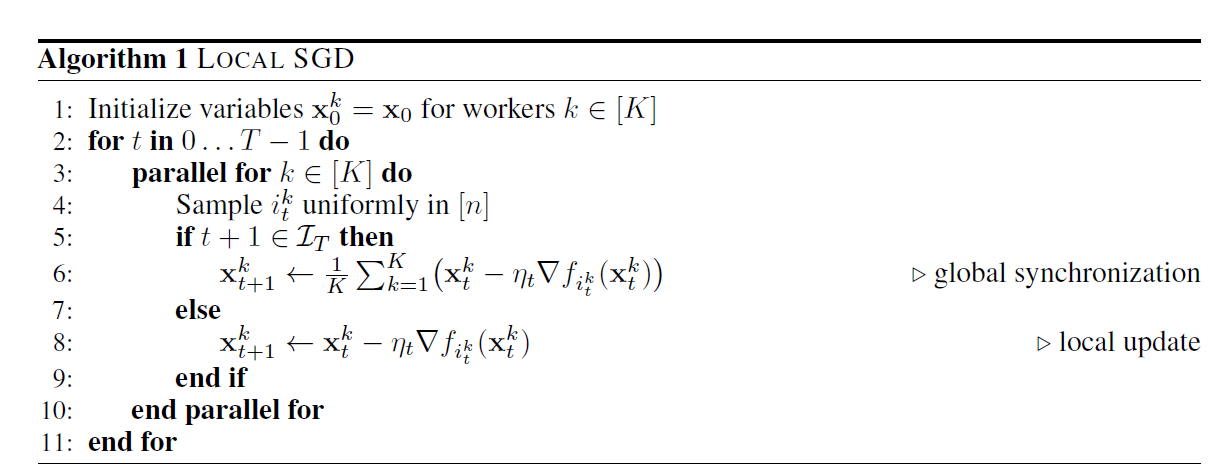

In [53]:
def training_batch_local(c,model):

    layer_old=()
   
  

    for n_iter in range(1,100):
        if n_iter%100==0:
            print("iteration number = " + str(n_iter))
            print("batch number = " + str(c))
        batch_x = x_train[c * batch_size: (c + 1) * batch_size]
        batch_y = y_train[c * batch_size: (c + 1) * batch_size]
        model.train_on_batch(batch_x, batch_y)
        c=c+1
        c=c%num_batch
        
        if n_iter == 100:
            layer_0=model.layers[0].get_weights()
            layer_1=model.layers[1].get_weights()
            layer_5=model.layers[5].get_weights()
            layer_7=model.layers[7].get_weights()
            layer_old = (layer_0_old,layer_1_old,layer_5_old,layer_7_old)
            

            
        
     
    return layer_old

In [54]:
model_local_1 = Sequential()
model_local_1.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model_local_1.add(Conv2D(64, (3, 3), activation='relu'))
model_local_1.add(MaxPooling2D(pool_size=(2, 2)))
model_local_1.add(Dropout(0.25))
model_local_1.add(Flatten())
model_local_1.add(Dense(128, activation='relu'))
model_local_1.add(Dropout(0.5))
model_local_1.add(Dense(num_classes, activation='softmax'))
model_local_1.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adadelta(),
            metrics=['accuracy'])



model_local_2 = Sequential()
model_local_2.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model_local_2.add(Conv2D(64, (3, 3), activation='relu'))
model_local_2.add(MaxPooling2D(pool_size=(2, 2)))
model_local_2.add(Dropout(0.25))
model_local_2.add(Flatten())
model_local_2.add(Dense(128, activation='relu'))
model_local_2.add(Dropout(0.5))
model_local_2.add(Dense(num_classes, activation='softmax'))
model_local_2.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adadelta(),
            metrics=['accuracy'])



model_local_3 = Sequential()
model_local_3.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model_local_3.add(Conv2D(64, (3, 3), activation='relu'))
model_local_3.add(MaxPooling2D(pool_size=(2, 2)))
model_local_3.add(Dropout(0.25))
model_local_3.add(Flatten())
model_local_3.add(Dense(128, activation='relu'))
model_local_3.add(Dropout(0.5))
model_local_3.add(Dense(num_classes, activation='softmax'))
model_local_3.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adadelta(),
            metrics=['accuracy'])





model_local_4 = Sequential()
model_local_4.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model_local_4.add(Conv2D(64, (3, 3), activation='relu'))
model_local_4.add(MaxPooling2D(pool_size=(2, 2)))
model_local_4.add(Dropout(0.25))
model_local_4.add(Flatten())
model_local_4.add(Dense(128, activation='relu'))
model_local_4.add(Dropout(0.5))
model_local_4.add(Dense(num_classes, activation='softmax'))
model_local_4.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adadelta(),
            metrics=['accuracy'])

In [60]:
for i in range(100):
        print (i)
        old_layer_n1=training_batch(1,model_local_1)
        old_layer_n2=training_batch(9,model_local_2)
        old_layer_n3=training_batch(11,model_local_3)
        old_layer_n4=training_batch(4,model_local_4)
        
        
        
        
        
        new_layer_0=[(i+j+k+l)/4 for i,j,k,l in zip(old_layer_n1[0],old_layer_n2[0],old_layer_n3[0],old_layer_n4[0])]
        new_layer_1=[(i+j+k+l)/4 for i,j,k,l in zip(old_layer_n2[1],old_layer_n2[1],old_layer_n3[1],old_layer_n4[1])]
        new_layer_5=[(i+j+k+l)/4 for i,j,k,l in zip(old_layer_n3[2],old_layer_n3[2],old_layer_n3[2],old_layer_n4[2])]
        new_layer_7=[(i+j+k+l)/4 for i,j,k,l in zip(old_layer_n4[3],old_layer_n4[3],old_layer_n3[3],old_layer_n4[3])]

        
        model_local_1.layers[0].set_weights(new_layer_0)
        model_local_1.layers[1].set_weights(new_layer_1)
        model_local_1.layers[5].set_weights(new_layer_5)
        model_local_1.layers[7].set_weights(new_layer_7)  
        
        
        
        model_local_2.layers[0].set_weights(new_layer_0)
        model_local_2.layers[1].set_weights(new_layer_1)
        model_local_2.layers[5].set_weights(new_layer_5)
        model_local_2.layers[7].set_weights(new_layer_7)  
        
        
        model_local_3.layers[0].set_weights(new_layer_0)
        model_local_3.layers[1].set_weights(new_layer_1)
        model_local_3.layers[5].set_weights(new_layer_5)
        model_local_3.layers[7].set_weights(new_layer_7)  
        
        
        
        model_local_4.layers[0].set_weights(new_layer_0)
        model_local_4.layers[1].set_weights(new_layer_1)
        model_local_4.layers[5].set_weights(new_layer_5)
        model_local_4.layers[7].set_weights(new_layer_7)  


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [61]:
score = model_local_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22099183558784297
Test accuracy: 0.960099995136261


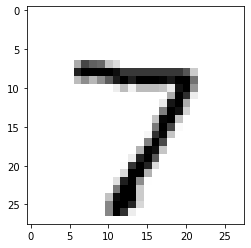

[3.00522163e-09 8.74031889e-11 1.09788725e-05 1.08462825e-06
 7.78516314e-12 3.32360701e-11 5.00090031e-15 9.99987364e-01
 7.72411468e-10 6.42101497e-07]
7


In [62]:
plt.imshow(x_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()
predictions = model.predict(x_test)
print (predictions[0])
print(np.argmax(np.round(predictions[0])))